The **k-Means Clustering** algorithm is one of the most popular clustering algorithms used in machine learning. The goal of k-Means Clustering is to find groups (clusters) in a given dataset. It can be used (1) to **confirm business assumptions** about what types of groups exist or (2) to **identify unknown groups** in complex data sets. Some examples of business-related use cases are:

>- Segment customers by purchase history;
>- Segment users by activities on an application or a website;
>- Group inventory by sales activity; or,
>- Group inventory by manufacturing metrics.


Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

# 0. LIBRARIES IMPORT

In [1]:
# import the pandas data science library
import pandas as pd
import numpy as np

# import the scipy spatial distance capability
from scipy.spatial.distance import cdist

# import sklearn data and data pre-processing libraries
from sklearn import datasets

# import sklearn k-means classifier library
from sklearn.cluster import KMeans

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlibs 3D plotting capabilities
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
plt.style.use('seaborn')
random_seed = 42

# 1. DATA PROCESSING

## a. data acquisition

The **Iris Dataset** is a classic and straightforward dataset often used as a "Hello World" example in multi-class classification. This data set consists of measurements taken from three different types of iris flowers (referred to as **Classes**),  namely the Iris Setosa, the Iris Versicolour and the Iris Virginica, and their respective measured petal and sepal length (referred to as **Features**).

In total, the dataset consists of **150 samples** (50 samples taken per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`


In [3]:
iris = datasets.load_iris()

Print and inspect feature names of the dataset:

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Print and inspect the class names of the dataset:

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Determine and print the feature dimensionality of the dataset:

In [6]:
iris.data.shape

(150, 4)

Let's now conduct a more in depth data assessment. Therefore, we plot the feature distributions of the Iris dataset according to their respective class memberships as well as the features pairwise relationships.

<Figure size 1000x1000 with 0 Axes>

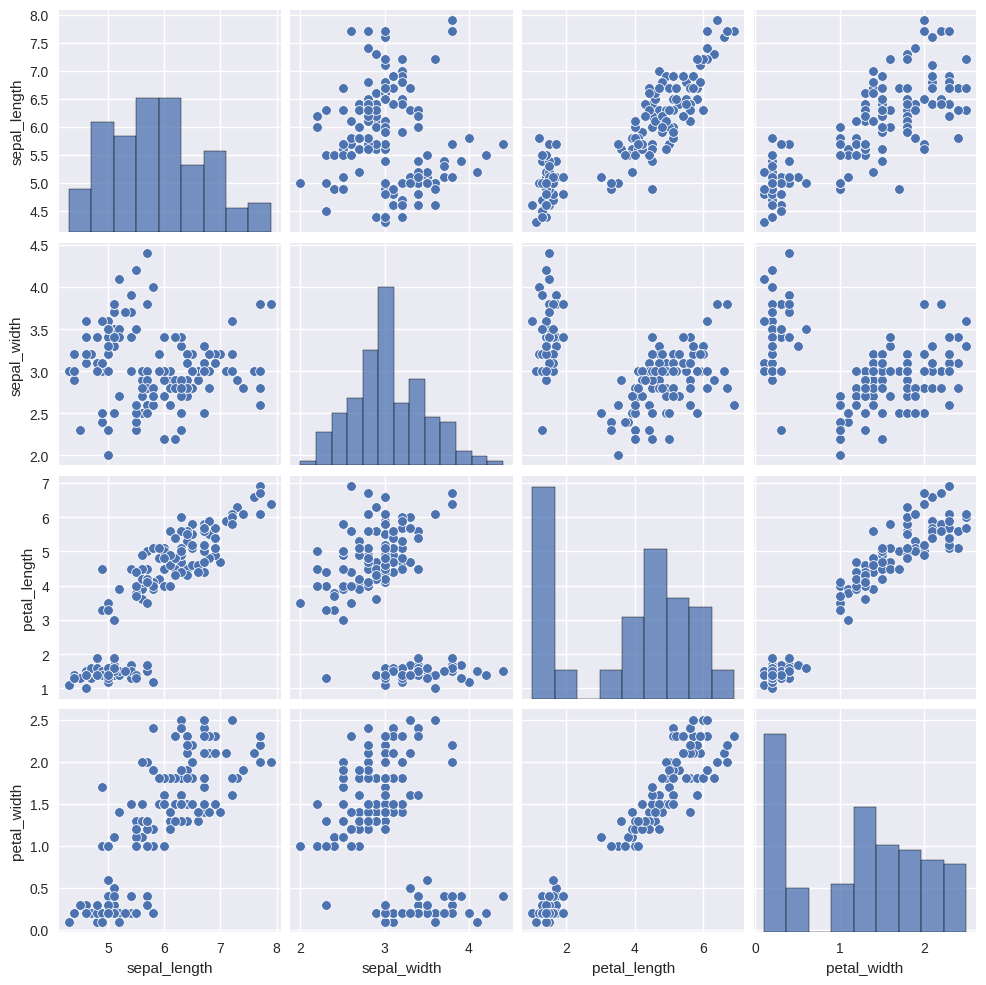

In [7]:
plt.figure(figsize=(10, 10))
iris_plot = sns.load_dataset("iris")

# supervised scenario
# sns.pairplot(iris_plot, diag_kind='hist', hue='species');

# unsupervised scenario
sns.pairplot(iris_plot, diag_kind='hist');

It can be observed from the created Pairplot, that most of the feature measurements correspond to at least two to three clusters that exhibit a nice **linear seperability**. Now imagine that we are not in possession of the `species` (class) label associated with each observation in the iris dataset. **How could we distinguish or infer the three iris flower species in the dataset?**

# 2. MODELING

## a. understanding k-Means

The **k-Means Clustering** algorithm is one of the most popular "first choice" unsupervised clustering algorithms to find groups (clusters) in a given multidimensional dataset $X$.


Thereby, the basic form of k-Means Clustering makes the following **two assumptions**:

- Each observation is closer to its own cluster center than to the center of the other clusters.
- A cluster center is the arithmetic mean of all the points that belong to the cluster.

Let's briefly revisit the distinct step of the algorithm before applying it to the iris dataset. Therefore, let's assume:

- We have dataset $X$ consisting records $x_1, x_2, x_3, ..., x_n \in \mathcal{R}^d$;
- That samples are clustered around $k$ centers (the "$k$ means") denoted by $\mu_1, \mu_{2}, ..., \mu_{k} \in \mathcal{R}^d$; and,
- Each sample $x_{i}$ belongs to its closest mean $\mu_{i}$.

We can then iteratively perform the following steps that comprise the **k-Means Clustering** algorithm:

>- **Step 1** - Pick $k$ random points $\mu_{i}$ as cluster centres called 'means'.
>- **Step 2** - Assign each $x_i$ to its to nearest cluster mean by calculating its distance to each mean.
>- **Step 3** - Determine the new cluster centres by calculating the average of the assigned points in each cluster.
>- **Step 4** - Repeat Step 2 and 3 until none of the cluster assignments change.

Note, that a single execution of all the four steps outlined above is usually referred to as 'iteration'.

## b. 2-D clustering

Now, let's see how we can apply it to the iris dataset. We will start with an introductory example of detecting the classes of the iris dataset based on two of its features namely the (1) `Petal length (cm)` and (2) `Petal width (cm)`. Let's first gain an intuition of those two features as well as their distribution by visualizing them accordingly:

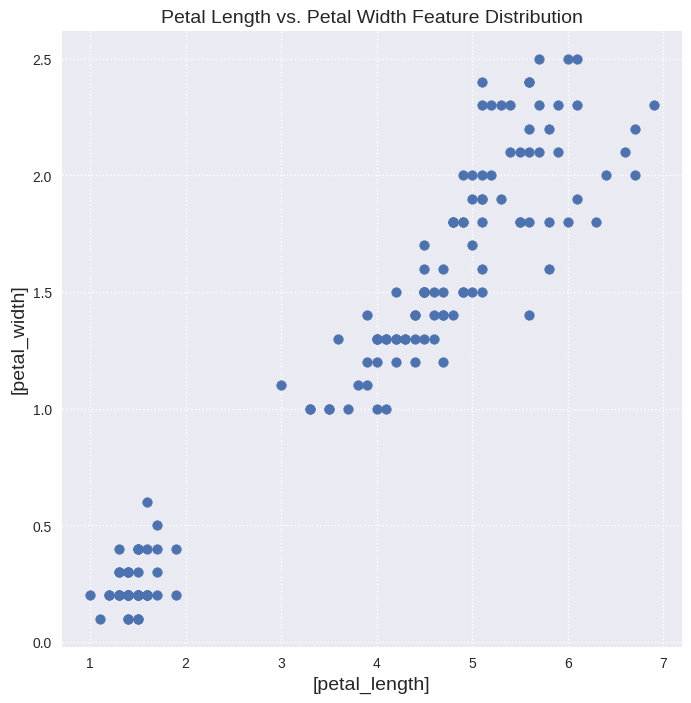

In [8]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot petal length (3rd feature in the dataset) vs. petal width (4th feature in the dataset)
ax.scatter(iris.data[:,2], iris.data[:,3])

# add axis legends
ax.set_xlabel("[petal_length]", fontsize=14)
ax.set_ylabel("[petal_width]", fontsize=14)

# add plot title
plt.title('Petal Length vs. Petal Width Feature Distribution', fontsize=14);

Let's now define the parameters of the k-Means Clustering. We will start by specifying the **number of clusters** $k$ we aim to detect in the iris dataset. We hypothesize that our observations are drawn from an unknown distributions of three iris flower species (each distribution corresponding to a different mean $\mu_1$, $\mu_2$, and, $\mu_3$). Therefore, we set the number of clusters to be detected to $k=3$:

In [9]:
no_clusters = 3

Next, we need to define a corresponding number of **initial 'means' $\mu_{i}$** (the initial random cluster centers) that will be used as 'starting points' in the first iteration of the clustering process. In our case we will specify $k=3$ cluster means each of dimension 2, since we aim to retrieve 3 clusters based on the 2 features `Petal length (cm)` and `Petal width (cm)`:

In [10]:
init_means = np.array([[1.0, 3.0], [2.0, 6.0], [1.0, 7.0]])

Finally, we will define a **maximum number of iterations** that we want to run the k-Means Clustering algorithm. Please, note that the clustering terminates once there will be no further changes in the cluster assignments. However, it's good practice to define an upper bound of the iterations applied in the clustering (especially when analyzing datasets that exhibt a high-dimensional feature space):

In [11]:
max_iterations = 10

Now, we ready to initialize an instance of the **k-Means Clustering** algorithm using Python's `sklearn` library of data science algorithms. Please note again, that for each classifier, available in the `Scikit-Learn` library, a designated and detailed documentation is provided. It often also includes a couple of practical examples and use cases. The documentation of the **k-Means Clustering** algorithm can be obtained from the following url:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [12]:
kmeans = KMeans(n_clusters=no_clusters, init=init_means, max_iter=max_iterations)

Let's run the k-Means Clustering to learn a model of the `Petal length (cm)` and  `Petal width (cm)` features. Pls. note that we are using columns 2 and 3 to extract the values of the two features from the iris dataset:

In [13]:
kmeans.fit(iris.data[:,2:4]) # note that we are using column 2 (petal length) and 3 (petal width)

KMeans(init=array([[1., 3.],
       [2., 6.],
       [1., 7.]]), max_iter=10,
       n_clusters=3)

Now that we have conducted the clustering, let's inspect the distinct cluster labels that have been assigned to the individual records of the iris dataset. This can be achieved by calling the `labels_` attribute of the fitted model:

In [14]:
labels = kmeans.labels_ # obtain the assigned cluster labels
print(labels)           # print the cluster labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


Furthermore, we want to inspect the coordinates of the cluster means (sometimes also referred to as "centroids") assigned by the algorithm. This can be achieved by calling the `cluster_centers_`attribute of the fitted model:

In [15]:
means = kmeans.cluster_centers_ # obtain the assigned cluster means
print(means)                    # print the cluster center coordinates

[[1.462      0.246     ]
 [5.63777778 2.06      ]
 [4.30727273 1.36181818]]


Let's now plot the iris dataset records using the two features `Petal length (cm)` and `Petal width (cm)` as well as the labels and cluster means determined by the **k-Means Clustering** algorithm:

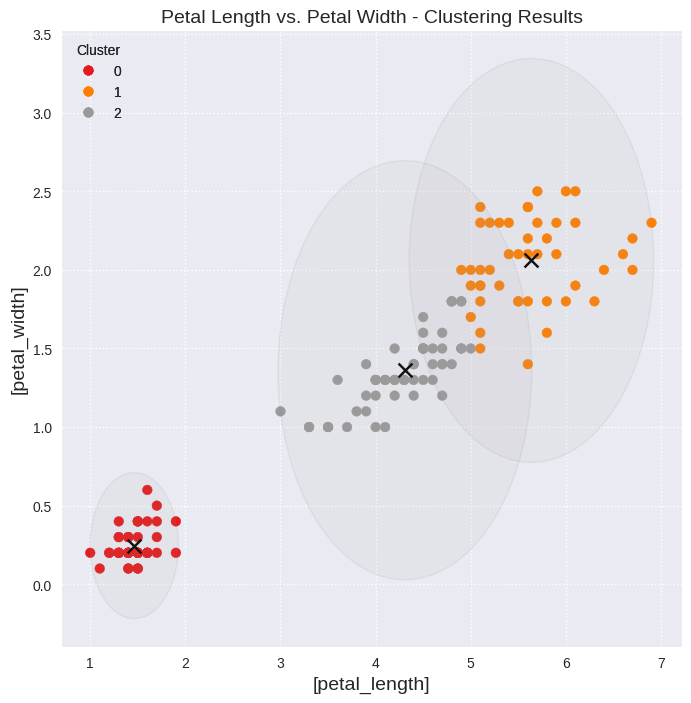

In [16]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot petal length vs. petal width and corresponding classes
scatter = ax.scatter(iris.data[:,2], iris.data[:,3], c=labels, cmap=plt.cm.Set1)

# prepare data legend
legend = ax.legend(*scatter.legend_elements(), loc='upper left', title='Cluster')

# add legend to plot
ax.add_artist(legend)

# plot cluster means
ax.scatter(means[:,0], means[:,1], marker='x', c='black', s=100)

# iterate over distinct cluster means
for i, mean in enumerate(means):

    # determine max cluster point distance
    cluster_radi = cdist(iris.data[:, 2:4][labels==i], [mean]).max()

    # plot cluster size
    ax.add_patch(plt.Circle(mean, cluster_radi, fc='darkgrey', edgecolor='slategrey', lw=1, alpha=0.1, zorder=1))

# add axis legends
ax.set_xlabel("[petal_length]", fontsize=14)
ax.set_ylabel("[petal_width]", fontsize=14)

# add plot title
plt.title('Petal Length vs. Petal Width - Clustering Results', fontsize=14);

It can be observed that, upon convergence, the **k-Means Clustering algorithm** nicely found three clusters in the dateset. Let's inspect to which extend this corresponds to the true 'species' class labels 'verginica', 'setosa', and 'versicolor' of the iris dataset to obtain an idea of the quality of the clusterin result:

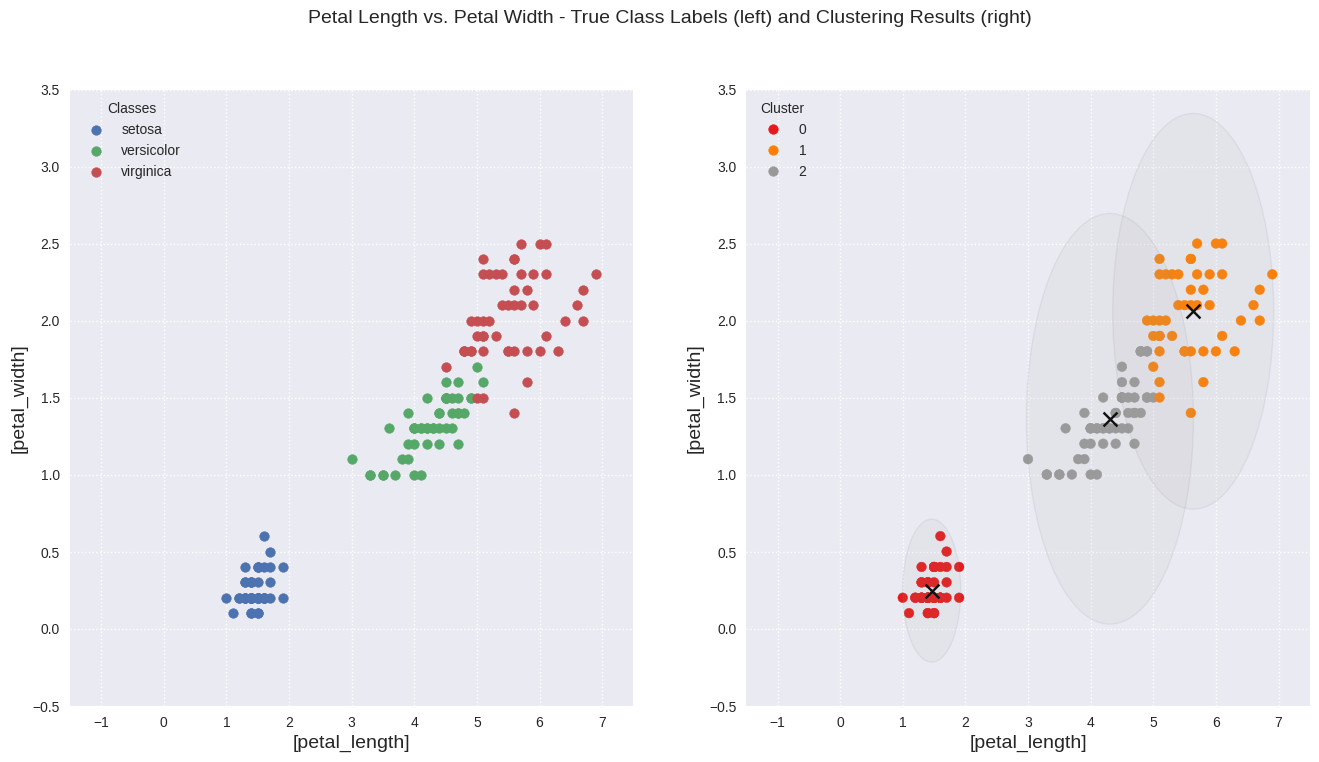

In [17]:
# init the plot
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

#### plot true iris class labels

# add grid
ax[0].grid(linestyle='dotted')

# iterate over distinct species
for species in np.unique(iris.target):

    # obtain iris petal length and petal width
    iris_features = iris.data[iris.target == species,:]

    # obtain iris species name
    iris_target_name = iris.target_names[species]

    # plot petal length vs. petal width as well as the true labels
    ax[0].scatter(iris_features[:,2], iris_features[:,3], c='C{}'.format(str(species)), label=iris_target_name)

# prepare data legend
ax[0].legend(loc='upper left', title='Classes')

# set axis range
ax[0].set_xlim([-1.5, 7.5])
ax[0].set_ylim([-0.5, 3.5])

# add axis legends
ax[0].set_xlabel("[petal_length]", fontsize=14)
ax[0].set_ylabel("[petal_width]", fontsize=14)

#### plot clustering results

# add grid
ax[1].grid(linestyle='dotted')

# plot petal length vs. petal width and corresponding classes
scatter = ax[1].scatter(iris.data[:,2], iris.data[:,3], c=labels, cmap=plt.cm.Set1)

# prepare data legend
ax[1].legend(*scatter.legend_elements(), loc='upper left', title='Cluster')

# plot cluster means
ax[1].scatter(means[:,0], means[:,1], marker='x', c='black', s=100)

# iterate over distinct cluster means
for i, mean in enumerate(means):

    # determine max cluster point distance
    cluster_radi = cdist(iris.data[:, 2:4][labels==i], [mean]).max()

    # plot cluster size
    ax[1].add_patch(plt.Circle(mean, cluster_radi, fc='darkgrey', edgecolor='slategrey', lw=1, alpha=0.1, zorder=1))

# set axis range
ax[1].set_xlim([-1.5, 7.5])
ax[1].set_ylim([-0.5, 3.5])

# add axis legends
ax[1].set_xlabel("[petal_length]", fontsize=14)
ax[1].set_ylabel("[petal_width]", fontsize=14)

# add plot title
plt.suptitle('Petal Length vs. Petal Width - True Class Labels (left) and Clustering Results (right)', fontsize=14);

Ok, it seems that our clustering did a quite good job.

In addition, let's inspect the distance of all dataset records $X$ to their nearest means $\mu_{i}$. Let's recall that k-Means Clustering conducts a local optimization of the sum of "squared errors", as expressed by:

$$E(\mu_{1}, \mu_{2}, ..., \mu_{k}) = \sum_{i=1}^{n}(x_{i}-\mu_{k(i)})^{2},$$

were $x_{i}$ denotes a feature vector (or observation) of the dataset and $\mu_{k(i)}$ its closest mean in the feature space $\mathcal{R}^{d}$.

We can obtain the sum of those squared distances $E(\mu_{1}, \mu_{2}, ..., \mu_{k})$ by calling the `inertia_` attribute of the learned k-Means Clustering model. It will return the sum of squared distances of each sample to its closest cluster center:

In [18]:
distances = kmeans.inertia_
print(distances)

31.437981063156823


## c. 3-D clustering

Let's see now understand how we can conduct a **k-Means Clustering** in higher dimensional feature spaces. We will now aim detecting the classes of the iris dataset based on three of its features namely the (1) `Petal length (cm)`, (2) `Petal width (cm)`, and (3) `Sepal length (cm)`. Let's first gain an intuition of those two features as well as their distribution by visualizing them accordingly in an interactive 3-dimensional plot.

To enable 3-dimensional plotting we use 'plotly' library

In [51]:
import plotly.graph_objects as go

Let's now extend the k-Means Clustering to a 3-dimensional features space $\mathcal{R}^{3}$ space by clustering the first three features of the Iris dataset. Upon successful plotting let's visually inspecting the 3-dimensional cluster distributions in the feature space:

In [50]:
# Create trace
trace = go.Scatter3d(
    x=iris.data[:, 0],  # Sepal Length
    y=iris.data[:, 1],  # Sepal Width
    z=iris.data[:, 2],  # Petal Length
    mode='markers',
    marker=dict(
        size=8,
        color='blue',                # Set color to an array/list of desired values
        opacity=0.8
    )
)

# Create layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Sepal Length'),
        yaxis=dict(title='Sepal Width'),
        zaxis=dict(title='Petal Length')
    ),
    margin=dict(l=0, r=0, t=0, b=0)
)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In order to conduct the clustering in the 3D feature space we will start again by defining a **max. number of clustering iterations** of the `sklearn` **k-Means Clustering** algorithm:

In [52]:
max_iterations = 10

Let's also initialize a corresponding number $k$ **initial random cluster 'means' $\mu_{i}$**. This time will specify $k=3$ cluster means each of dimension 3, since we aim to retrieve 3 clusters based on the 3 features `Sepal length (cm)`, `Sepal width (cm)`, and `Petal length (cm)`:

In [53]:
init_means = np.array([[1.0, 3.0, 3.0], [2.0, 6.0, 5.0], [1.0, 7.0, 2.0]])

Now, we ready to initialize an instance of the **k-Means Clustering** algorithm using Python's `sklearn` library of data science algorithms:

In [54]:
kmeans = KMeans(n_clusters=no_clusters, init=init_means, max_iter=max_iterations)

Let's run the k-Means Clustering to now learn a model of the `Sepal length (cm)`, `Sepal width (cm)`, and `Petal length (cm)` features. Pls. note that we are using columns 0, 1, and 2 to extract the values of the three features from the iris dataset:

In [55]:
kmeans.fit(iris.data[:,0:3]) # note that we are using column 1 (sepal length), 2 (sepal width) and 3 (petal length)

KMeans(init=array([[1., 3., 3.],
       [2., 6., 5.],
       [1., 7., 2.]]),
       max_iter=10, n_clusters=3)

Let's again inspect the labels assigned to each individual record:

In [56]:
labels = kmeans.labels_ # obtain the assigned cluster labels
print(labels)           # print the cluster labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


As well as the determined cluster means:

In [57]:
means = kmeans.cluster_centers_ # obtain the assigned cluster means
print(means)                    # print the cluster center coordinates

[[5.006      3.428      1.462     ]
 [5.86833333 2.74       4.38166667]
 [6.8525     3.07       5.6925    ]]


Let's also plot the iris dataset records using the three features `Sepal length (cm)`, `Sepal width (cm)` and `Petal length (cm)`, their corresponding learned labels as well as the cluster means as determined by the **k-Means Clustering** algorithm:

In [39]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# init 3D plotting
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

# add grid
ax.grid(linestyle='dotted')

# plot petal length vs. petal width and corresponding classes
ax.scatter(iris.data[:,0], iris.data[:,1], iris.data[:,2], c=labels, cmap=plt.cm.Set1, s=40)

# plot cluster means
ax.scatter(means[:,0], means[:,1], means[:,2], marker='x', c='black', s=100)

# add axis legends
ax.set_xlabel("[sepal_length]", fontsize=14)
ax.set_ylabel("[sepal_width]", fontsize=14)
ax.set_zlabel("[petal_length]", fontsize=14)

# add plot title
plt.title('Sepal Length vs. Sepal Width vs. Petal Length', fontsize=14);

# show the 3-dimensional plot
plt.show();

<IPython.core.display.Javascript object>

In [59]:
# Create trace for data points
trace_data = go.Scatter3d(
    x=iris.data[:, 0],  # Sepal Length
    y=iris.data[:, 1],  # Sepal Width
    z=iris.data[:, 2],  # Petal Length
    mode='markers',
    marker=dict(
        size=8,
        color=labels,                # Set color to cluster labels
        colorscale='Viridis',       # Use a predefined colorscale
        opacity=0.8
    ),
    name='Data Points'
)

# Create trace for cluster means
trace_means = go.Scatter3d(
    x=means[:, 0],
    y=means[:, 1],
    z=means[:, 2],
    mode='markers',
    marker=dict(
        symbol='x',
        color='black',
        size=12
    ),
    name='Cluster Means'
)

# Create layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Sepal Length'),
        yaxis=dict(title='Sepal Width'),
        zaxis=dict(title='Petal Length')
    ),
    margin=dict(l=0, r=0, t=0, b=0)
)

# Create plot
fig = go.Figure(data=[trace_data, trace_means], layout=layout)
fig.show()

Inspecting the clustering results we can observe that the means of the nicely converged to three separating cluster in the three dimensional feature space. Finally, let's again inspect the distance of all dataset records $X$ to their nearest means $\mu_{i}$ by calling the `inertia_` attribute of the learned k-Means Clustering model:

In [60]:
distances = kmeans.inertia_
print(distances)

69.44196666666667


Enable inline Jupyter notebook plotting:

In [61]:
%matplotlib inline

## d. k-Means drawbacks

Even though the **k-Means Clustering** algorithm is one of the most popular clustering algorithms used in machine learning. There are three major drawbacks associated with it, which are explained hereafter:

1. The k-Means Clustering is guaranteed to improve the result in each iteration but there are **no guarantees** that it will find the **global best of clusters**.


2. The k-Means Clustering **can't learn** the **optimal number of clusters** from the provided data. E.g., if we ask the algorithm for 20 clusters it will find 20 clusters, which may or may not be meaningful.

> **Practical solution:** Use the "Elbow" technique as explained in the next section of the notebook. Another option might be the usage of a more complex clustering algorithm like Gaussian Mixture Models, or one that can choose a suitable number of clusters, e.g., the DBSCAN clustering algorithm.

3. The k-Means Clustering **doesn't work well** in instances of a **non-linear seperable** dataset. This is caused by its assumption that points will be closer to their own cluster center than to others.

> **Practical solution:** Transform (if possible) the dataset into a higher dimension where a linear separation becomes possible, e.g., by using a spectral clustering algorithm.

## e. optimal 'k'

Recall that, one of the basic ideas behind unsupervised machine learning methods, such as **k-Means clustering**, is to define clusters for which the total intra-cluster variation (usually measured by the total sum of squared distances) is minimized:

$$k^{*} =\underset{k}{\arg \min} \sum_{i=1}^{n}(x_{i}-\mu_{k(i)})^{2},$$

were $x_{i}$ denotes a single feature vector (or observation) in the dataset and $\mu_{k(i)}$ its closest mean in the feature space $\mathcal{R}^{d}$. Challenge: What is the optimal number of clusters $k$ for a given dataset? Selection of the right $k$ may result in the following issues:

- if $k$ too small (under-segmentation), then the clusters are too diverse; and;
- if $k$ too high (over-segmentation), then the clusters are too fine-grain.



Solution: We can then use the sum of "squared errors" $E(\mu_{1}, \mu_{2}, ..., \mu_{k})$ metric to find an optimal number of clusters $k$! This can be achieved by the execution of the so-called **'Elbow'** technique defined by the following algorithm:

>- **Step 1** - Compute the k-Means clustering algorithm for different number of clusters $k$.
>- **Step 2** - For each $k$ calculate the sum of the within-cluster sum of squared distances $E(\mu_{1}, \mu_{2}, ..., \mu_{k})$.
>- **Step 3** - For each $k$ plot the $k$ value vs. its corresponding sum of within-cluster sum of squared distances $E$.
>- **Step 4** - Inspect the plot and determine the location of a bend (appropriate number of clusters).

Let's utilize the **'Elbow'** technique by first defining a max. number of iterations that we aim to apply at each k-Means clustering run:

In [62]:
max_iterations = 100

Now we can implement the and run the 'elbow' technique:

In [63]:
# init the list of squared distances
sum_of_squared_distances = []

# define the range of k-values to investigate
K = range(1,30)

# iterate over all k-values
for k in K:

    # init the k-Means clustering algorithm of the current k-value
    kmeans = KMeans(n_clusters=k, init='random', max_iter=max_iterations)

    # run the k-Means clustering of sepal-length and sepal-width features
    kmeans = kmeans.fit(iris.data[:,0:2])

    # collect the sum of within squared distances of the current k-value
    sum_of_squared_distances.append(kmeans.inertia_)

Upon completion of the loop above let's inspect the distinct within-cluster sum of squared distances $E$:

In [64]:
# print the collected sum of squared distances of each k
sum_of_squared_distances

[130.4752666666667,
 58.204092789066735,
 37.05070212765956,
 27.9902120383037,
 20.95735586730691,
 17.734108734402852,
 14.831523892773891,
 12.769108279651388,
 10.989723950026583,
 9.995049422799426,
 9.567798507864689,
 8.31728235653236,
 7.923085388553661,
 6.831161870808931,
 5.869602869352871,
 5.844833694083691,
 5.670789632881739,
 5.2590343406593405,
 4.728925324675323,
 4.493353896103896,
 4.1614794584500485,
 3.920195915195915,
 3.697895909645912,
 3.72566896407686,
 3.32079329004329,
 3.31700072150072,
 3.233146825396827,
 3.1819945887445877,
 2.838183982683981]

Furthermore, let's plot the cluster number $k$ vs. the within-cluster sum of squared distances $E$:

<IPython.core.display.Javascript object>

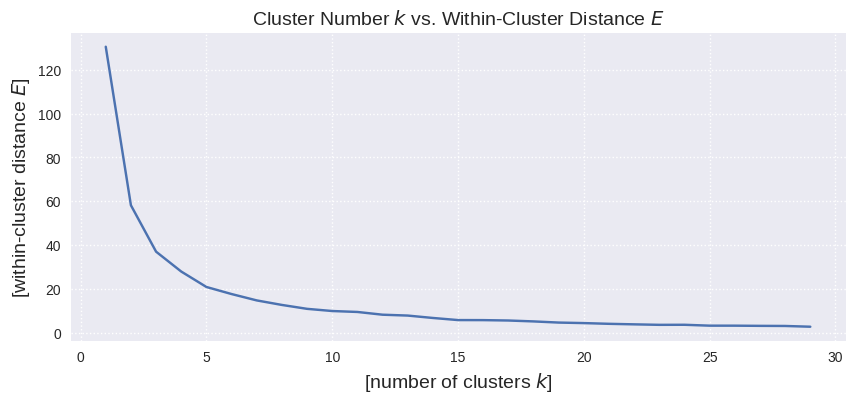

In [65]:
# init the plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot petal length (3rd feature in the dataset) vs. petal width (4th feature in the dataset)
ax.plot(K, sum_of_squared_distances)

# add axis legends
ax.set_xlabel("[number of clusters $k$]", fontsize=14)
ax.set_ylabel("[within-cluster distance $E$]", fontsize=14)

# add plot title
plt.title('Cluster Number $k$ vs. Within-Cluster Distance $E$', fontsize=14);